<a href="https://colab.research.google.com/github/Mrunali95/Thesis/blob/master/Multivariate_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.python.keras.layers import Dense,LSTM,Dropout
from tensorflow.python.keras import Sequential
from keras import metrics
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
## Download data of US Dollar Index

dfUSD = web.DataReader('DX-Y.NYB', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfUSD.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-01,93.309998,93.080002,93.190002,93.209999,0.0,93.209999
1990-01-02,94.309998,93.080002,93.129997,94.290001,0.0,94.290001
1990-01-03,94.519997,94.080002,94.150002,94.419998,0.0,94.419998
1990-01-04,93.879997,92.389999,93.720001,92.519997,0.0,92.519997
1990-01-05,93.419998,92.550003,93.339996,92.849998,0.0,92.849998


In [ ]:
## download data of NASDAQ index

dfnasdaq = web.DataReader('^IXIC', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfnasdaq.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,459.299988,452.700012,452.899994,459.299988,110720000,459.299988
1990-01-03,461.600006,460.000000,461.100006,460.899994,152660000,460.899994
1990-01-04,460.799988,456.899994,460.399994,459.399994,147950000,459.399994
1990-01-05,459.399994,457.799988,457.899994,458.200012,137230000,458.200012
1990-01-08,458.700012,456.500000,457.100006,458.700012,115500000,458.700012


In [ ]:
## download data of Dow Jones Industrial Average index

dfdaia = web.DataReader('^DJI', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfdaia.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,2811.649902,2732.510010,2748.719971,2810.149902,20680000,2810.149902
1990-01-03,2834.040039,2786.260010,2814.199951,2809.729980,23620000,2809.729980
1990-01-04,2821.459961,2766.419922,2804.389893,2796.080078,24370000,2796.080078
1990-01-05,2810.149902,2758.110107,2786.899902,2773.250000,20290000,2773.250000
1990-01-08,2803.969971,2753.409912,2761.729980,2794.370117,16610000,2794.370117


In [ ]:
## download data of S&P 500 index

dfsp = web.DataReader('^GSPC', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfsp.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,359.690002,351.980011,353.399994,359.690002,162070000,359.690002
1990-01-03,360.589996,357.890015,359.690002,358.760010,192330000,358.760010
1990-01-04,358.760010,352.890015,358.760010,355.670013,177000000,355.670013
1990-01-05,355.670013,351.350006,355.670013,352.200012,158530000,352.200012
1990-01-08,354.239990,350.540009,352.200012,353.790009,140110000,353.790009


In [ ]:
## download data of NYSE index

dfnyse = web.DataReader('^NYA', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfnyse.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,2093.600098,2093.600098,2093.600098,2093.600098,0,2093.600098
1990-01-03,2091.479980,2091.479980,2091.479980,2091.479980,0,2091.479980
1990-01-04,2075.520020,2075.520020,2075.520020,2075.520020,0,2075.520020
1990-01-05,2058.070068,2058.070068,2058.070068,2058.070068,0,2058.070068
1990-01-08,2065.370117,2065.370117,2065.370117,2065.370117,0,2065.370117


In [ ]:
newdfUSD = dfUSD[(dfUSD.index).isin(dfnasdaq.index)]


In [ ]:
absent = dfdaia[~(dfdaia.index).isin(newdfUSD.index)]

In [ ]:
newdfnasdaq = dfnasdaq[~(dfnasdaq.index).isin(absent.index)]
newdfdaia = dfdaia[~(dfdaia.index).isin(absent.index)]
newdfnyse = dfnyse[~(dfnyse.index).isin(absent.index)]
newdfsp = dfsp[~(dfsp.index).isin(absent.index)]

In [ ]:
finaldata = pd.DataFrame(columns=['USD','NASDAQ','DJAI','NYSE','S&P'])

finaldata['USD'] = newdfUSD['Close']
finaldata['NASDAQ'] = newdfnasdaq['Close']
finaldata['DJAI'] = newdfdaia['Close']
finaldata['NYSE'] = newdfnyse['Close']
finaldata['S&P'] = newdfsp['Close']

finaldata.head()

,USD,NASDAQ,DJAI,NYSE,S&P
Date,,,,,
1990-01-02,94.290001,459.299988,2810.149902,2093.600098,359.690002
1990-01-03,94.419998,460.899994,2809.729980,2091.479980,358.760010
1990-01-04,92.519997,459.399994,2796.080078,2075.520020,355.670013
1990-01-05,92.849998,458.200012,2773.250000,2058.070068,352.200012
1990-01-08,92.050003,458.700012,2794.370117,2065.370117,353.790009


In [ ]:
#Get the number of rows and columns in the data set
finaldata.shape

(7526, 5)

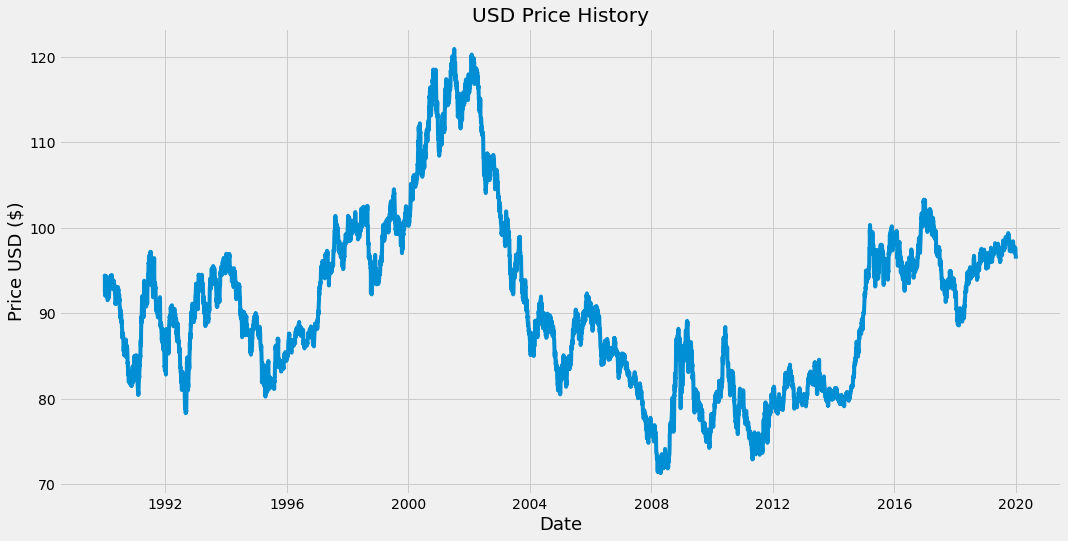

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('USD Price History')
plt.plot(finaldata['USD'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price USD ($)', fontsize=18)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

uscaler = MinMaxScaler(feature_range=(0, 1))
unorm = uscaler.fit_transform(np.array(finaldata['USD']).reshape(-1,1))

nqscaler = MinMaxScaler(feature_range=(0, 1))
nqnorm = nqscaler.fit_transform(np.array(finaldata['NASDAQ']).reshape(-1,1))

dscaler = MinMaxScaler(feature_range=(0, 1))
dnorm = dscaler.fit_transform(np.array(finaldata['DJAI']).reshape(-1,1))

nyscaler = MinMaxScaler(feature_range=(0, 1))
nynorm = nyscaler.fit_transform(np.array(finaldata['NYSE']).reshape(-1,1))

spscaler = MinMaxScaler(feature_range=(0, 1))
spnorm = spscaler.fit_transform(np.array(finaldata['S&P']).reshape(-1,1))

In [ ]:
normdata = pd.DataFrame(columns=['USD','NASDAQ','DJAI','NYSE','S&P'])

normdata['USD'] = unorm.flatten()
normdata['NASDAQ'] = nqnorm.flatten()
normdata['DJAI'] = dnorm.flatten()
normdata['NYSE'] = nynorm.flatten()
normdata['S&P'] = spnorm.flatten()

normdata.index = finaldata.index

In [ ]:
from statsmodels.tsa.stattools import adfuller

for i in normdata.columns:
  from statsmodels.tsa.stattools import adfuller
  #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:', i)
  dftest = adfuller(normdata[i], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)
  print("-------------------------------------------")

  ## Applying time shifting, we subtract every the point by the one that preceded it to make data stationary
stat_df = pd.DataFrame(columns=['NASDAQ','DJAI','NYSE','S&P'])
for i in normdata.columns:
  df = normdata[i] - normdata[i].shift()
  df.dropna(inplace=True)
  stat_df[i] = df

print("\n*****************************After Difference**************************************\n")
for i in stat_df.columns:
  from statsmodels.tsa.stattools import adfuller
  #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:', i)
  dftest = adfuller(stat_df[i], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)
  print("-------------------------------------------")

Results of Dickey-Fuller Test: USD
Test Statistic                   -1.974825
p-value                           0.297719
#Lags Used                        0.000000
Number of Observations Used    7525.000000
Critical Value (1%)              -3.431219
Critical Value (5%)              -2.861924
Critical Value (10%)             -2.566974
dtype: float64
-------------------------------------------
Results of Dickey-Fuller Test: NASDAQ
Test Statistic                    1.703705
p-value                           0.998138
#Lags Used                       30.000000
Number of Observations Used    7495.000000
Critical Value (1%)              -3.431223
Critical Value (5%)              -2.861926
Critical Value (10%)             -2.566975
dtype: float64
-------------------------------------------
Results of Dickey-Fuller Test: DJAI
Test Statistic                    1.435696
p-value                           0.997270
#Lags Used                       19.000000
Number of Observations Used    7506.000000

In [ ]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['Date'] = df.index
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    
    return df

In [ ]:
stat_df = create_features(stat_df)

In [ ]:
train_data= stat_df[0:int(len(stat_df)*0.68)]
Val_data = stat_df[int(len(stat_df)*0.68):int(len(stat_df)*0.8)]
test_data = stat_df[int(len(stat_df)*0.8):]


In [ ]:
a = train_data.drop(['USD','Date'], axis=1).values
x_train = a.reshape(a.shape[0], a.shape[1], 1)
print(x_train.shape)

y_train = train_data['USD'].values
print(y_train.shape)

(5117, 11, 1)
(5117,)


In [ ]:
b = test_data.drop(['USD','Date'], axis=1).values
x_test = b.reshape(b.shape[0], b.shape[1], 1)
print(x_test.shape)

y_test = test_data['USD'].values
print(y_test.shape)

(1505, 11, 1)
(1505,)


In [ ]:
c = Val_data.drop(['USD','Date'], axis=1).values
x_val = c.reshape(c.shape[0], c.shape[1], 1)
print(x_val.shape)

y_val = Val_data['USD'].values
print(y_val.shape)

(903, 11, 1)
(903,)


In [ ]:
##run multiple times
import numpy as np
import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(1234)


#Build the LSTM model
model = Sequential()
model.add(LSTM(units = 50 , activation='relu', return_sequences=True, input_shape= (x_train.shape[1], 1))) # Add layers to our model, 50 Neurons, True as we are going to use anothe LSTM layer
#model.add(Dropout(0.2))

model.add(LSTM(units = 50, activation='relu', return_sequences=True)) 
#model.add(Dropout(0.2))

model.add(LSTM(units = 70, activation='relu', return_sequences=True)) 
#model.add(Dropout(0.2))

model.add(LSTM(units = 35, activation='relu')) 
#model.add(Dropout(0.2))

model.add(Dense(25)) # Densely connected neural network with 25 Neurons
model.add(Dense(1))
model.add(Dropout(0.2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
model.summary()


model.fit(x_train, y_train,validation_data=(x_val,y_val),epochs=50, batch_size=80, verbose=1)


Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_146 (LSTM)              (None, 11, 50)            10400     
_________________________________________________________________
lstm_147 (LSTM)              (None, 11, 50)            20200     
_________________________________________________________________
lstm_148 (LSTM)              (None, 11, 70)            33880     
_________________________________________________________________
lstm_149 (LSTM)              (None, 35)                14840     
_________________________________________________________________
dense_78 (Dense)             (None, 25)                900       
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 26        
_________________________________________________________________
dropout_51 (Dropout)         (None, 1)               

In [ ]:
# Test Data Prediction

predictions = model.predict(x_test)

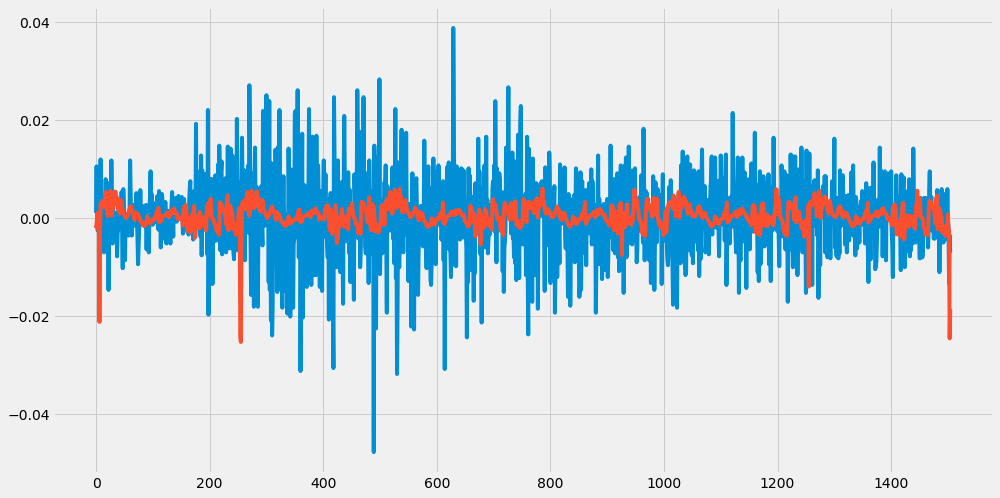

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_test)
plt.plot(predictions)

In [ ]:
y = pd.Series(y_test.flatten())
ycs = y.cumsum()

p = pd.Series(predictions.flatten())
pcs = p.cumsum()

y=np.array(ycs).reshape(-1,1)
yt = uscaler.inverse_transform(y)
yt = np.array(yt).flatten()
yt = yt+ 8.729996
yt = pd.Series(yt, index=test_data.index)

p=np.array(pcs).reshape(-1,1)
pt = uscaler.inverse_transform(p)
pt = np.array(pt).flatten()
pt = pt+8.729996
pt = pd.Series(pt, index=test_data.index)

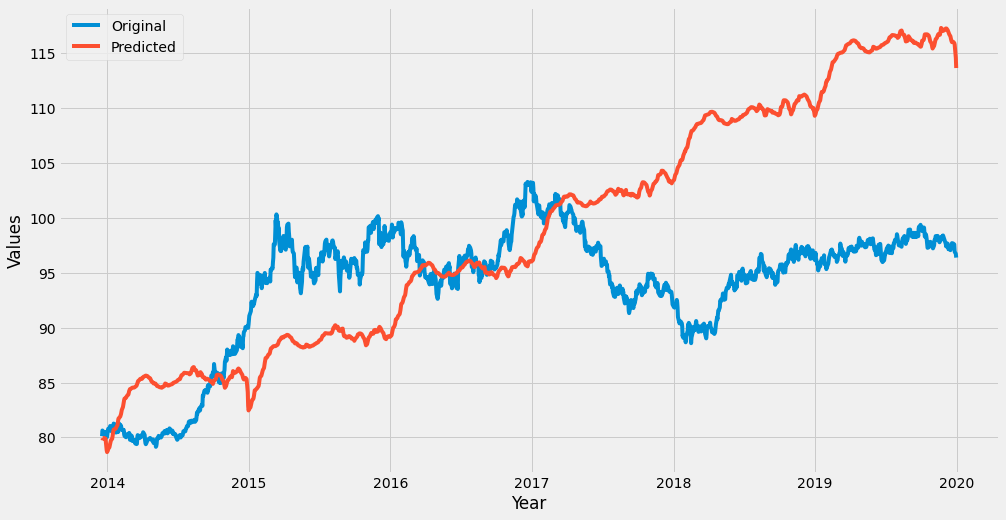

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(yt)
plt.plot(pt)
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(['Original','Predicted'])

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = math.sqrt(mean_squared_error(yt, pt))
print('Root Mean Squared Error: %.3f'% rmse)
mae = mean_absolute_error(yt, pt)
print('Mean Absolute Error: %.3f'% mae)
mape = np.mean(np.abs(pt - yt)/np.abs(yt))
print('Mean Absolute Percentage Error: %.3f'% (mape))

Root Mean Squared Error: 10.843
Mean Absolute Error: 8.790
Mean Absolute Percentage Error: 0.093


In [ ]:
from google.colab import drive
drive.mount('drive')
data = pd.DataFrame(columns=['LSTM_yt','LSTM_pt'])
data['LSTM_yt'] = yt
data['LSTM_pt'] = pt
data.to_csv('Finalresult.csv')
!cp Finalresult.csv "drive/My Drive/"

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_126 (LSTM)              (None, 11, 35)            5180      
_________________________________________________________________
lstm_127 (LSTM)              (None, 11, 50)            17200     
_________________________________________________________________
lstm_128 (LSTM)              (None, 11, 70)            33880     
_________________________________________________________________
lstm_129 (LSTM)              (None, 25)                9600      
_________________________________________________________________
dense_68 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 26        
_________________________________________________________________
dropout_46 (Dropout)         (None, 1)               

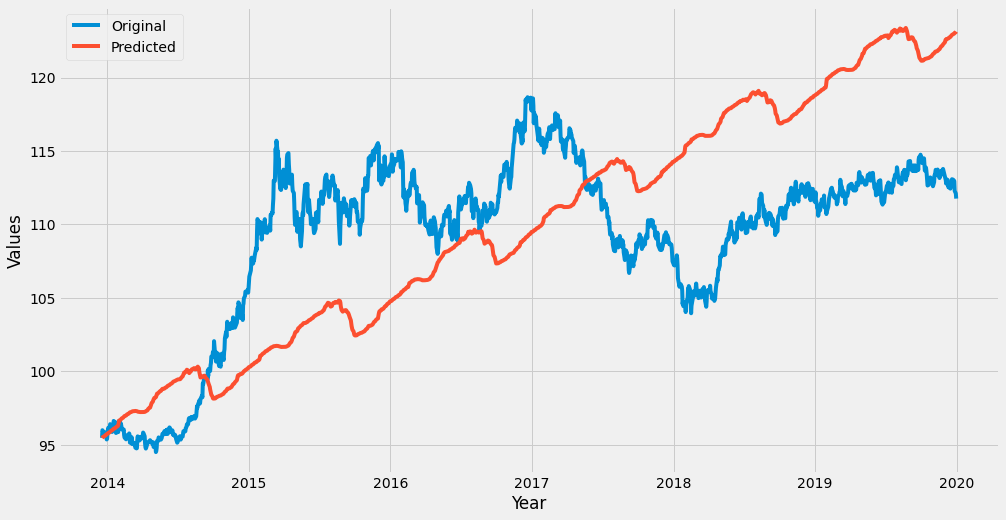

In [ ]:
##run multiple times
import numpy as np
import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(1234)


#Build the LSTM model
model = Sequential()
model.add(LSTM(units = 35 , activation='relu', return_sequences=True, input_shape= (x_train.shape[1], 1))) # Add layers to our model, 50 Neurons, True as we are going to use anothe LSTM layer
#model.add(Dropout(0.2))

model.add(LSTM(units = 50, activation='relu', return_sequences=True)) 
#model.add(Dropout(0.2))

model.add(LSTM(units = 70, activation='relu', return_sequences=True)) 
#model.add(Dropout(0.2))

model.add(LSTM(units = 25, activation='relu')) 
#model.add(Dropout(0.2))

model.add(Dense(25)) # Densely connected neural network with 25 Neurons
model.add(Dense(1))
model.add(Dropout(0.2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
model.summary()


model.fit(x_train, y_train,validation_data=(x_val,y_val),epochs=50, batch_size=80, verbose=1)

# Test Data Prediction

predictions = model.predict(x_test)

y = pd.Series(y_test.flatten())
ycs = y.cumsum()

p = pd.Series(predictions.flatten())
pcs = p.cumsum()

y=np.array(ycs).reshape(-1,1)
yt = uscaler.inverse_transform(y)
yt = np.array(yt).flatten()
yt = yt+ 24.099
yt = pd.Series(yt, index=test_data.index)

p=np.array(pcs).reshape(-1,1)
pt = uscaler.inverse_transform(p)
pt = np.array(pt).flatten()
pt = pt+24.099
pt = pd.Series(pt, index=test_data.index)


plt.figure(figsize=(15,8))
plt.plot(yt)
plt.plot(pt)
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(['Original','Predicted'])

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_138 (LSTM)              (None, 11, 45)            8460      
_________________________________________________________________
lstm_139 (LSTM)              (None, 11, 65)            28860     
_________________________________________________________________
lstm_140 (LSTM)              (None, 11, 80)            46720     
_________________________________________________________________
lstm_141 (LSTM)              (None, 35)                16240     
_________________________________________________________________
dense_74 (Dense)             (None, 25)                900       
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 26        
_________________________________________________________________
dropout_49 (Dropout)         (None, 1)               

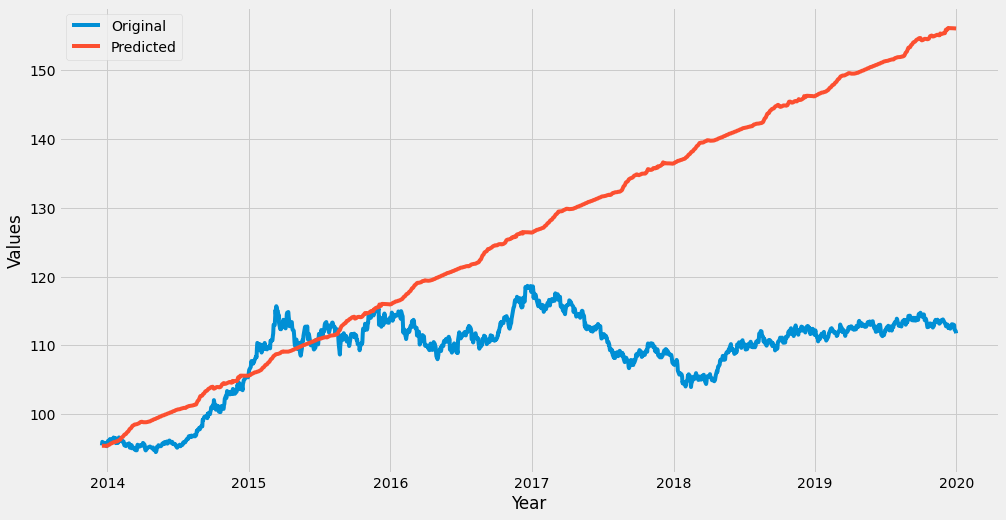

In [ ]:
##run multiple times
import numpy as np
import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(1234)


#Build the LSTM model
model = Sequential()
model.add(LSTM(units = 45 , activation='relu', return_sequences=True, input_shape= (x_train.shape[1], 1))) # Add layers to our model, 50 Neurons, True as we are going to use anothe LSTM layer
#model.add(Dropout(0.2))

model.add(LSTM(units = 65, activation='relu', return_sequences=True)) 
#model.add(Dropout(0.2))

model.add(LSTM(units = 80, activation='relu', return_sequences=True)) 
#model.add(Dropout(0.2))

model.add(LSTM(units = 35, activation='relu')) 
#model.add(Dropout(0.2))

model.add(Dense(25)) # Densely connected neural network with 25 Neurons
model.add(Dense(1))
model.add(Dropout(0.2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
model.summary()


model.fit(x_train, y_train,validation_data=(x_val,y_val),epochs=50, batch_size=80, verbose=1)

# Test Data Prediction

predictions = model.predict(x_test)

y = pd.Series(y_test.flatten())
ycs = y.cumsum()

p = pd.Series(predictions.flatten())
pcs = p.cumsum()

y=np.array(ycs).reshape(-1,1)
yt = uscaler.inverse_transform(y)
yt = np.array(yt).flatten()
yt = yt+ 24.099
yt = pd.Series(yt, index=test_data.index)

p=np.array(pcs).reshape(-1,1)
pt = uscaler.inverse_transform(p)
pt = np.array(pt).flatten()
pt = pt+24.099
pt = pd.Series(pt, index=test_data.index)


plt.figure(figsize=(15,8))
plt.plot(yt)
plt.plot(pt)
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(['Original','Predicted'])

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_142 (LSTM)              (None, 11, 35)            5180      
_________________________________________________________________
lstm_143 (LSTM)              (None, 11, 55)            20020     
_________________________________________________________________
lstm_144 (LSTM)              (None, 11, 70)            35280     
_________________________________________________________________
lstm_145 (LSTM)              (None, 20)                7280      
_________________________________________________________________
dense_76 (Dense)             (None, 25)                525       
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 26        
_________________________________________________________________
dropout_50 (Dropout)         (None, 1)               

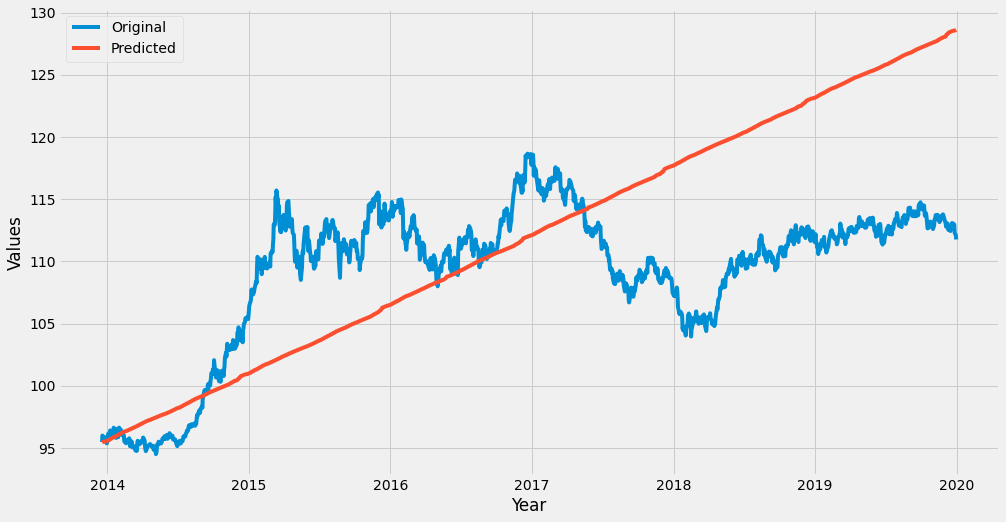

In [ ]:
##run multiple times
import numpy as np
import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(1234)


#Build the LSTM model
model = Sequential()
model.add(LSTM(units = 35 , activation='relu', return_sequences=True, input_shape= (x_train.shape[1], 1))) # Add layers to our model, 50 Neurons, True as we are going to use anothe LSTM layer
#model.add(Dropout(0.2))

model.add(LSTM(units = 55, activation='relu', return_sequences=True)) 
#model.add(Dropout(0.2))

model.add(LSTM(units = 70, activation='relu', return_sequences=True)) 
#model.add(Dropout(0.2))

model.add(LSTM(units = 20, activation='relu')) 
#model.add(Dropout(0.2))

model.add(Dense(25)) # Densely connected neural network with 25 Neurons
model.add(Dense(1))
model.add(Dropout(0.2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
model.summary()


model.fit(x_train, y_train,validation_data=(x_val,y_val),epochs=30, batch_size=30, verbose=1)

# Test Data Prediction

predictions = model.predict(x_test)

y = pd.Series(y_test.flatten())
ycs = y.cumsum()

p = pd.Series(predictions.flatten())
pcs = p.cumsum()

y=np.array(ycs).reshape(-1,1)
yt = uscaler.inverse_transform(y)
yt = np.array(yt).flatten()
yt = yt+ 24.099
yt = pd.Series(yt, index=test_data.index)

p=np.array(pcs).reshape(-1,1)
pt = uscaler.inverse_transform(p)
pt = np.array(pt).flatten()
pt = pt+24.099
pt = pd.Series(pt, index=test_data.index)


plt.figure(figsize=(15,8))
plt.plot(yt)
plt.plot(pt)
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(['Original','Predicted'])